In this notebook we do $KKL$ gradient descent on Gaussians and mixture of Gaussians for different parameters.

In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

import kkl.divergences as dv
import kkl.kernels as kl
import kkl.gradient_descent as gd
import kkl.generate_data as gy

In [61]:
plt.rcParams['xtick.labelsize'] = 20  
plt.rcParams['ytick.labelsize'] = 20  
plt.rcParams['legend.fontsize'] = 15  
plt.rcParams['axes.labelsize'] = 20   
plt.rcParams['axes.titlesize'] = 20  

In [2]:
n = 50 
m = 50 
T = 100 
eps = 0.0001
alpha = 0.01

# p gaussian and q mixture of gaussians different d

In [65]:
def gradient_descent(J,dJ,x0,h,eps,n_it_max):
    x = x0 
    grad = dJ(x)
    J_val = J(x)
    X = [x0]
    i = 0 
    l_J = []
    while np.linalg.norm(grad) > eps and i < n_it_max:
        l_J.append(J_val)
        grad = dJ(x)
        x = x - h * grad
        X.append(x)
        J_val = J(x)
        i = i + 1
    return np.array(X),l_J      

In [79]:
n = 50
m = 50
T = 100 # number of iterations
eps = 0.0001
alpha = 0.01

C:\Users\cleme\DOC\Annee_2023_2024\code\Regularized\kkl\divergences.py:10: RuntimeWarning: invalid value encountered in log
  return np.where(t > 0, np.log(t), 0.)
C:\Users\cleme\AppData\Local\Temp\ipykernel_17304\1632813316.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  L[:,i] = np.array(l_J)


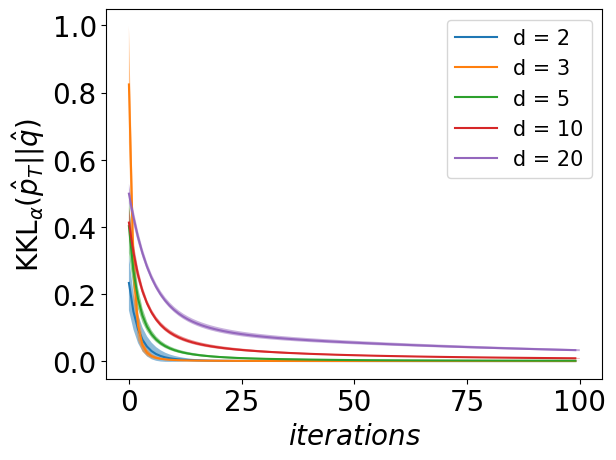

In [80]:
nb_it = 10
for d in [2,3,5,10,20]:
 
    MUy = [np.zeros(d),np.ones(d)]
    Lx = np.random.randn(d,d)
    Ly1 = np.random.randn(d,d)
    Ly2 = np.random.randn(d,d)
    Sigmax =  Lx.T @ Lx
    Sigmay1 =  Ly1.T @ Ly1
    Sigmay2 =  Ly2.T @ Ly2
    
    L = np.zeros((T,nb_it))
    I_L = np.zeros(T)
    
    for i in range(nb_it):
        
        mu_x = np.random.randn(d)
        x0 = scs.multivariate_normal.rvs(mu_x,Sigmax,n)
        y = gy.mixt_gauss(MUy,[Sigmay1,Sigmay2],[1/2,1/2],m)
        Ky = 1/m * k(y,y) 
        
        sigma =np.around(np.mean(np.abs(x0[:,None]-y[None,:])**2),decimals = 1)
        k = lambda x,y :  kl.k_gauss(x,y,sigma)
        dk = lambda x,y : kl.dk_gauss(x,y,sigma)

        h = np.sqrt(1/n**2 * np.sum((x0[:,None]-y[None,:])**2)) * n**(-1/(d+4))

        J = lambda x : dv.KKL(x, y, k, Ky, alpha) 
        dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Ky, alpha, sigma) 

        X,l_J = gradient_descent(J, dJ, x0, h, eps, T)
        L[:,i] = np.array(l_J)
    L_sum = np.mean(L,axis = 1)
    I_L = np.std(L,axis = 1)
    plt.plot(L_sum,label = "d = " + str(d))
    plt.fill_between(np.linspace(0,100,100),L_sum - I_L,L_sum + I_L,alpha = 0.5)
plt.legend()
plt.xlabel(r"$iterations$")
plt.ylabel(r"KKL$_{\alpha}(\hat{p}_T || \hat{q})$")
plt.savefig('plots_neurips/gd_mixgauss_d_moy_mean.pdf',bbox_inches='tight')

# p and q gaussians

C:\Users\cleme\DOC\Annee_2023_2024\code\Regularized\kkl\divergences.py:10: RuntimeWarning: invalid value encountered in log
  return np.where(t > 0, np.log(t), 0.)
C:\Users\cleme\AppData\Local\Temp\ipykernel_17304\2629518543.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  L[:,i] = np.array(l_J)


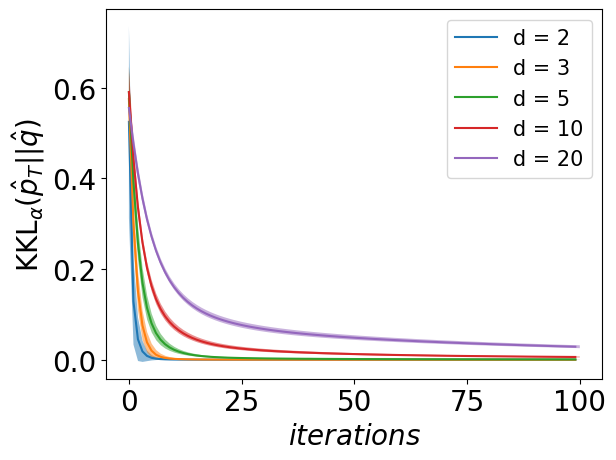

In [81]:
nb_it = 20
for d in [2,3,5,10,20]:
 
    Muy = np.zeros(d)
    Lx = np.random.randn(d,d)
    Ly1 = np.random.randn(d,d)
    Ly2 = np.random.randn(d,d)
    Sigmax =  Lx.T @ Lx
    Sigmay1 =  Ly1.T @ Ly1
    Sigmay2 =  Ly2.T @ Ly2
    
    L = np.zeros((T,nb_it))
    I_L = np.zeros(T)
    
    for i in range(nb_it):
        
        mu_x = np.random.randn(d)
        x0 = scs.multivariate_normal.rvs(mu_x,Sigmax,n)
        y = gy.gaussian(Muy,Sigmay1,m)
        
        sigma =np.around(np.mean(np.abs(x0[:,None]-y[None,:])**2),decimals = 1)
        k = lambda x,y :  kl.k_gauss(x,y,sigma)
        dk = lambda x,y : kl.dk_gauss(x,y,sigma)


        Ky = 1/m * k(y,y) 

        h = np.sqrt(1/n**2 * np.sum((x0[:,None]-y[None,:])**2)) * n**(-1/(d+4))

        J = lambda x : dv.KKL(x, y, k, Ky, alpha) 
        dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Ky, alpha, sigma) 

        X,l_J = gradient_descent(J, dJ, x0, h, eps, T)
        L[:,i] = np.array(l_J)
    
    L_sum = np.mean(L,axis = 1)
    I_L = np.std(L,axis = 1)
    plt.plot(L_sum,label = "d = " + str(d))
    plt.fill_between(np.linspace(0,100,100),L_sum - I_L,L_sum + I_L,alpha = 0.5)
    
plt.legend()
plt.xlabel(r"$iterations$")
plt.ylabel(r"KKL$_{\alpha}(\hat{p}_T || \hat{q})$")
plt.savefig('plots_neurips/gd_gauss_d.pdf',bbox_inches='tight')

# p gaussian and q mixture of gaussians different $\alpha$, d = 10.

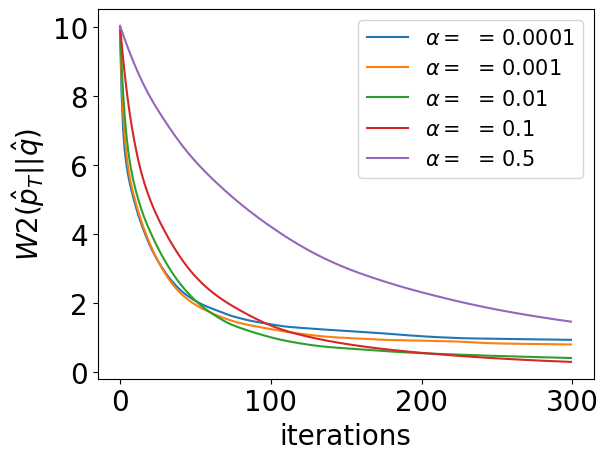

In [60]:
n = 50 
m = 50 
T = 300 
eps = 0.000001
d = 10
h = 5
sigma = 10

MUy = [np.zeros(d),np.ones(d)]
Ly1 = np.random.randn(d,d)
Ly2 = np.random.randn(d,d)
Sigmay1 =  Ly1.T @ Ly1
Sigmay2 =  Ly2.T @ Ly2

nb_it = 10

for alpha in [1e-4,1e-3,0.01,0.1,0.5]:
    
    W2 = np.zeros(T)
    
    for i in range(nb_it):
        mu_x = np.random.randn(d)
        Lx = np.random.randn(d,d)
        Sigmax =  Lx.T @ Lx
        x0 = scs.multivariate_normal.rvs(mu_x,Sigmax,n)
        y = gy.mixt_gauss(MUy,[Sigmay1,Sigmay2],[1/2,1/2],m)
        
        k = lambda x,y :  kl.k_gauss(x,y,sigma)
        dk = lambda x,y : kl.dk_gauss(x,y,sigma)


        Ky = 1/m * k(y,y) 

        J = lambda x : dv.KKL(x, y, k, Ky, alpha) 
        dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Ky, alpha, sigma) 

        X = gd.gradient_descent(J, dJ, x0, h, eps, T)
        for t in range(T):
            x_t = X[t]
            a = np.ones((len(x_t),)) / len(x_t)
            b = np.ones((len(y),)) / len(y)
            M = ot.dist(x_t,y,metric = "euclidean")
            W2[t] = W2[t] + 1/nb_it * ot.emd2(a,b,M)
        
    plt.plot(W2,label = r"$\alpha =$ "" = " + str(alpha))
plt.legend()
plt.xlabel("iterations")
plt.ylabel(r"$W2(\hat{p}_T || \hat{q})$")
plt.savefig('plots_neurips/gd_mixgauss_d10_moy_mean.pdf',bbox_inches='tight')